In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
file_path = 'sales data-set.csv'
data = pd.read_csv(file_path)

## Descriptive Statistics 

In [4]:
# Display the first few rows and summary information
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


(None,
    Store  Dept        Date  Weekly_Sales  IsHoliday
 0      1     1  05/02/2010      24924.50      False
 1      1     1  12/02/2010      46039.49       True
 2      1     1  19/02/2010      41595.55      False
 3      1     1  26/02/2010      19403.54      False
 4      1     1  05/03/2010      21827.90      False)

In [6]:
# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [9]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [10]:
# Generate summary statistics for numerical columns
summary_statistics = data.describe()
summary_statistics

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


**Weekly_Sales :**
- Negative values are present, which might indicate returns or errors.
- Sales vary significantly, with a maximum value of 693,099.36.

## Visualization

In [12]:
# Set the visual style
sns.set(style='whitegrid')

### Distribution of Weekly Sales

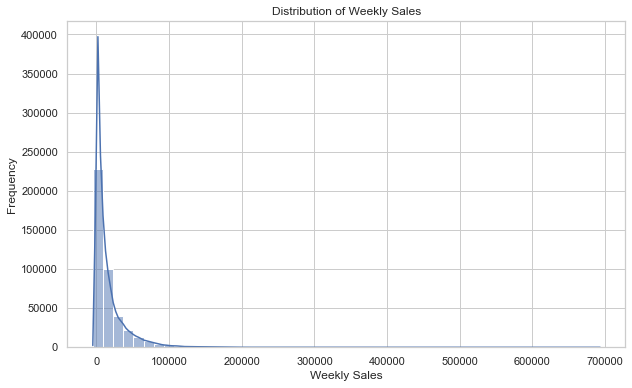

In [13]:
# Plot histogram for Weekly_Sales
plt.figure(figsize=(10, 6))
sns.histplot(data['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- The majority of weekly sales are clustered below $50,000.
- There are outliers with very high sales.
- The presence of negative values indicates potential returns or data entry errors.

### Box Plot of Weekly Sales

C:\Users\ajink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


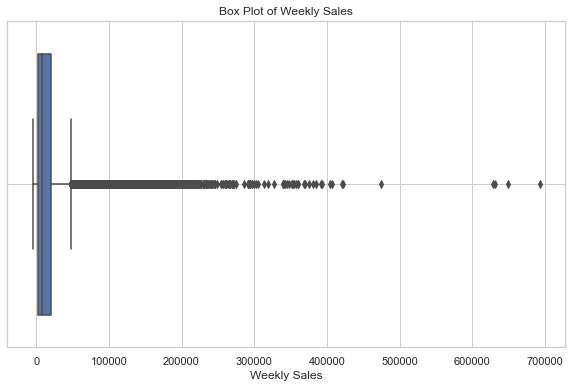

In [14]:
# Plot box plot for Weekly_Sales
plt.figure(figsize=(10, 6))
sns.boxplot(data['Weekly_Sales'])
plt.title('Box Plot of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.grid(True)
plt.show()

- Outliers are apparent above the 75th percentile.
- Median weekly sales are around $7,600.

### Total Weekly Sales by Store

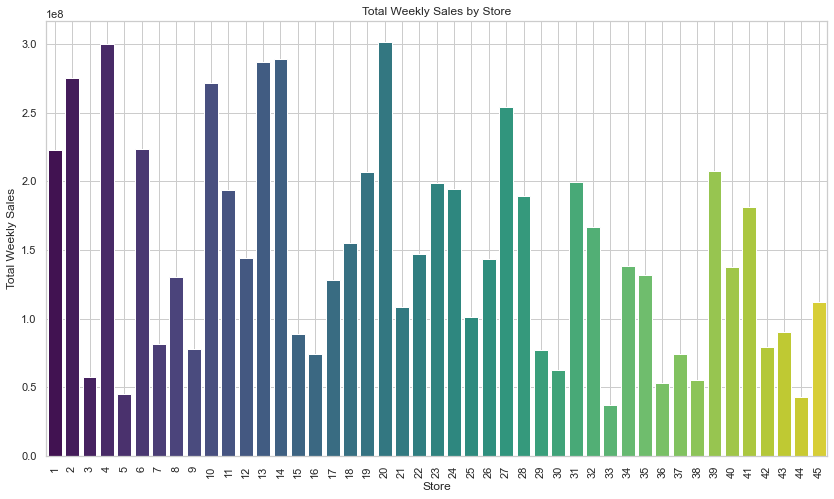

In [15]:
# Plot bar chart for Store
plt.figure(figsize=(14, 8))
store_sales = data.groupby('Store')['Weekly_Sales'].sum().reset_index().sort_values(by='Weekly_Sales', ascending=False)
sns.barplot(x='Store', y='Weekly_Sales', data=store_sales, palette='viridis')
plt.title('Total Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

- Sales vary significantly across stores.
- Some stores have much higher total sales than others.

### Total Weekly Sales by Department

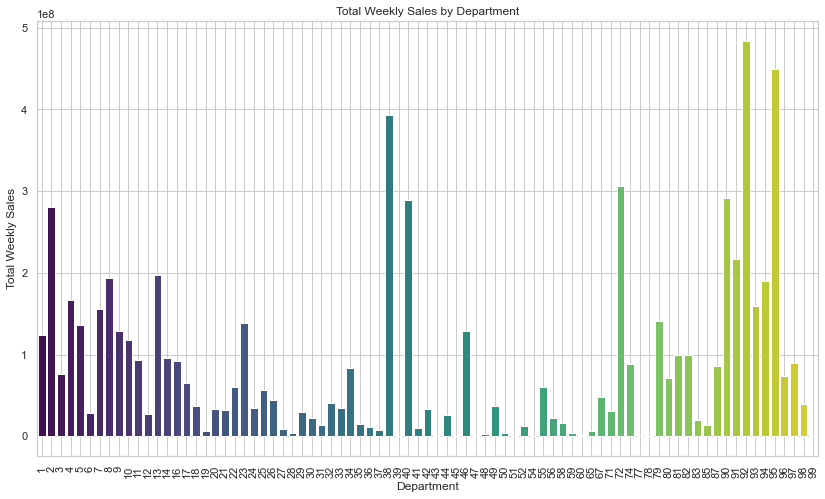

In [16]:
# Plot bar chart for Dept
plt.figure(figsize=(14, 8))
dept_sales = data.groupby('Dept')['Weekly_Sales'].sum().reset_index().sort_values(by='Weekly_Sales', ascending=False)
sns.barplot(x='Dept', y='Weekly_Sales', data=dept_sales, palette='viridis')
plt.title('Total Weekly Sales by Department')
plt.xlabel('Department')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

- Certain departments generate much higher sales than others.
- A few departments contribute significantly to total sales.

### Average Weekly Sales: Holiday vs. Non-Holiday

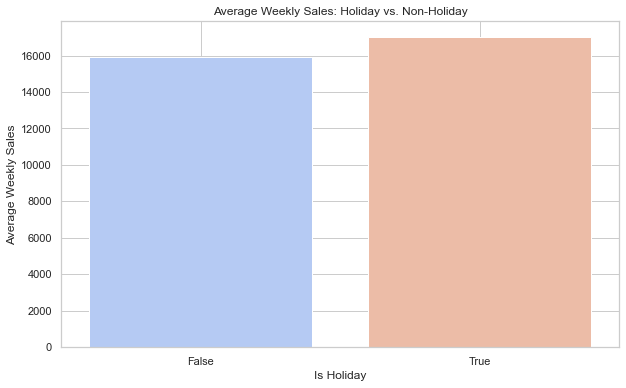

In [17]:
# Plot bar chart for IsHoliday
plt.figure(figsize=(10, 6))
holiday_sales = data.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=holiday_sales, palette='coolwarm')
plt.title('Average Weekly Sales: Holiday vs. Non-Holiday')
plt.xlabel('Is Holiday')
plt.ylabel('Average Weekly Sales')
plt.grid(True)
plt.show()

- Sales are generally higher during holidays compared to non-holidays.
- The average weekly sales increase during holidays.

### Weekly Sales vs. Store

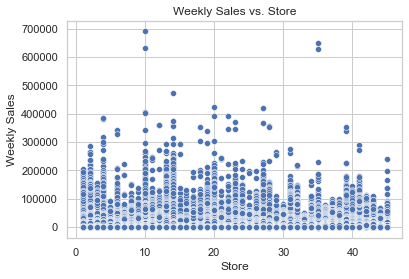

In [18]:
sns.scatterplot(x='Store', y='Weekly_Sales', data=data)
plt.title('Weekly Sales vs. Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

### Weekly Sales vs. Department

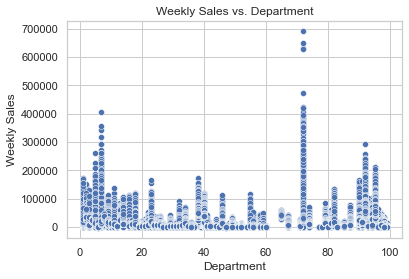

In [19]:
sns.scatterplot(x='Dept', y='Weekly_Sales', data=data)
plt.title('Weekly Sales vs. Department')
plt.xlabel('Department')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

### Total Weekly Sales Over Time

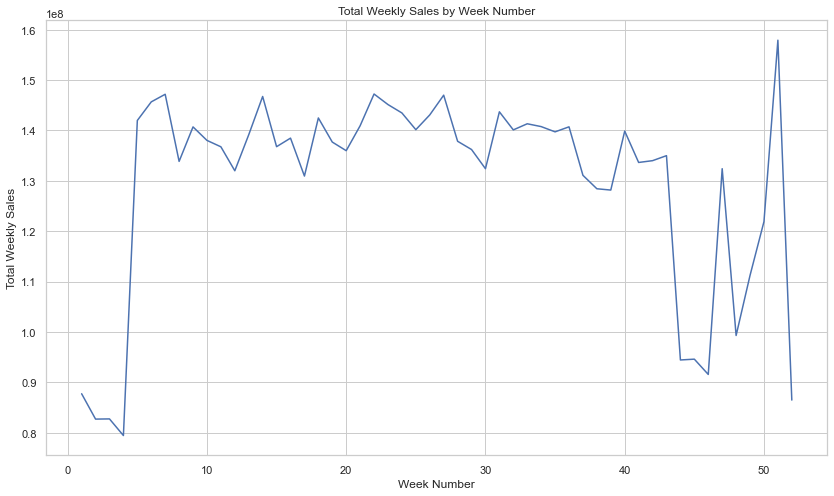

In [24]:
# Add a column for the week number
data['Week_Number'] = data['Date'].dt.isocalendar().week

# Group by Week_Number and sum the Weekly_Sales
data_grouped_by_week = data.groupby('Week_Number')['Weekly_Sales'].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(x='Week_Number', y='Weekly_Sales', data=data_grouped_by_week)
plt.title('Total Weekly Sales by Week Number')
plt.xlabel('Week Number')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.show()

### Correlation Heatmap

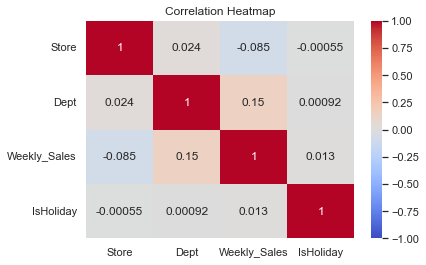

In [21]:
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()
